
    
# Hamoye Stage C Quiz<br>

 **By: Ani Chidera Priscilla** <br>
 **ID - a9918f**


## Question 1

In [46]:
tp = 355
tn = 120
fp = 1480
fn = 45
precision = tp / (tp + fp)
recall= tp / (tp + fn)
f1_score=  2*((precision* recall)/(precision+recall))

round(f1_score,4)

0.3177

### Answer 
 0.3177

## Question 4

In [51]:
tp1 = 82
tn1 = 98
fp1 = 2
fn1 = 18

recall= tp1 / (tp1 + fn1)
print('recall: %f' % recall)

recall: 0.820000


### Answer 
TN = 98%, FP = 2%, FN = 18%, TP = 82%  (highest recall with lowest false positive)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('figure',figsize=(12,4)) 

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.drop('stab', axis=1, inplace=True)
df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable


In [4]:
df.shape

(10000, 13)

In [5]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [6]:
df.describe() 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [7]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
X = df.drop(columns='stabf')
y = df['stabf']

In [9]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [10]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_trainscale = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_trainscale.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [11]:
x_test.reset_index(drop=True, inplace=True)
x_testscale = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_testscale.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727


## Question 14

In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=1)

#Train the model 
rf.fit(x_trainscale,y_train)

rf_pred=rf.predict(x_testscale)

In [13]:
#confusion matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix,classification_report

cnf_mat = confusion_matrix(y_true=y_test, y_pred=rf_pred, labels=['stable', 'unstable'])
cnf_mat 

array([[ 625,   87],
       [  55, 1233]], dtype=int64)

In [35]:
print('Random Forest Classification Report:')
print (classification_report(y_test, rf_pred))
print('----Random Forest Metrics----')
#accuracy
print('Accuracy:')
print(round(accuracy_score(y_test, rf_pred),4))

Random Forest Classification Report:
              precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

----Random Forest Metrics----
Accuracy:
0.929


### Answer
0.9295

## Question 15

XGBoost

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1,max_depth=3, learning_rate=0.1)

xgb.fit(x_trainscale, y_train)

xg_pred = xgb.predict(x_testscale)

In [44]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=xg_pred, labels=['stable', 'unstable'])
print(cnf_mat)

[[ 603  109]
 [  52 1236]]


In [45]:
print('Extreme Boost Classification Report:')
print (classification_report(y_test, xg_pred))
print('----Extreme Boost Metrics----')
#accuracy
print('Accuracy:')
print(round(accuracy_score(y_test, xg_pred),4))

Extreme Boost Classification Report:
              precision    recall  f1-score   support

      stable       0.92      0.85      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000

----Extreme Boost Metrics----
Accuracy:
0.9195


### Answer
0.9195

# Question 16

LightBGM

In [25]:
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier(random_state=1)

LGBM.fit(x_trainscale,y_train)

lg_pred = LGBM.predict(x_testscale)

In [26]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=lg_pred, labels=['stable', 'unstable'])
print(cnf_mat)

[[ 635   77]
 [  48 1240]]


In [38]:
print('Light Gradient Classification Report:')
print (classification_report(y_test, lg_pred))
print('----Light Gradient Metrics----')
print('Accuracy:')
print(round(accuracy_score(y_test, lg_pred),4))

Light Gradient Classification Report:
              precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

----Light Gradient Metrics----
Accuracy:
0.9375


### Answer
0.9375

Extra Trees Classifier

In [52]:
from sklearn.ensemble import ExtraTreesClassifier 
# Building the model 
et = ExtraTreesClassifier(random_state=1) 
  
# Training the model 
et.fit(x_trainscale, y_train) 

et_pred = et.predict(x_testscale)

In [53]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=et_pred, labels=['stable', 'unstable'])
cnf_mat

array([[ 606,  106],
       [  38, 1250]], dtype=int64)

In [54]:
print('Extra Trees Classification Report:')
print (classification_report(y_test, et_pred))
print('----Extra Trees Metrics----')
#accuracy
print('Accuracy:')
print(round(accuracy_score(y_test, et_pred),4))

Extra Trees Classification Report:
              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000

----Extra Trees Metrics----
Accuracy:
0.928


Improving Trees

In [28]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

print(hyperparameter_grid)


et_random = RandomizedSearchCV(et,hyperparameter_grid, random_state=1,cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
# Fit the random search model
et_random.fit(x_trainscale, y_train)

{'n_estimators': [50, 100, 300, 500, 1000], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2', None]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.8s finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

## Question 17

In [29]:
print(f'best param of the ExtraTreeClassifier is: {et_random.best_params_}')

best param of the ExtraTreeClassifier is: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


In [30]:
print(f'best score is: {et_random.best_score_}')

best score is: 0.9241249999999999


## Question 18

In [32]:
et_2 = ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, 
                             max_features = None, random_state = 1)

et_2.fit(x_trainscale, y_train)

et2_pred = et_2.predict(x_testscale)

In [33]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=et2_pred, labels=['stable', 'unstable'])
print(cnf_mat)

[[ 619   93]
 [  53 1235]]


In [39]:
print('Improved Trees Classification Report:')
print (classification_report(y_test, et2_pred))
print('----Improved Trees Metrics----')
#accuracy
print('Accuracy:')
print(round(accuracy_score(y_test, et2_pred),4))

Improved Trees Classification Report:
              precision    recall  f1-score   support

      stable       0.92      0.87      0.89       712
    unstable       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000

----Improved Trees Metrics----
Accuracy:
0.927


### Answer
Lower

## Question 20

In [40]:
feature_importance = et_2.feature_importances_ 

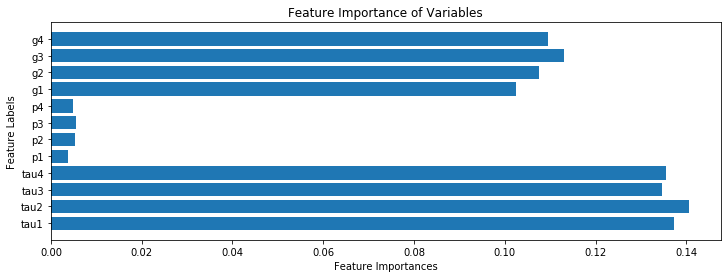

In [42]:
plt.barh(x_trainscale.columns, feature_importance)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Feature Importance of Variables')
plt.show()

### Answer
tau2,p1